In [70]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
np.random.seed(1)

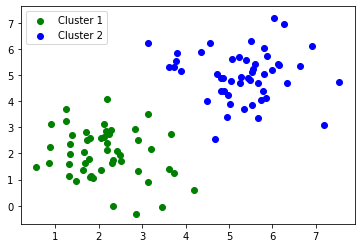

In [71]:
# Data generation
mean1 = [2,2]
cov1 = [[1,0],[0,1]]
mean2 = [5,5]
cov2 = [[1,0],[0,1]]
x1 = np.random.multivariate_normal(mean1, cov1, 50)
x2 = np.random.multivariate_normal(mean2, cov2, 50)
plt.scatter(x1[:,0],x1[:,1], c='green',label = 'Cluster 1')
plt.scatter(x2[:,0],x2[:,1], c='blue',label = 'Cluster 2')
plt.legend()

In [72]:
#initialize cluster centroids
def Centroids_Init(X, N_clusters):
    index_random = np.random.permutation(X.shape[0]) #permutation is to shuffle your original data order 
    centroids = X[index_random[:N_clusters]]
    return centroids

In [73]:
# compute distance from samples to centroids of clusters
def Compute_Distance(X, Centroids): # X dim: 100*2 Centroids dim: k*2
    distance = np.zeros((X.shape[0],Centroids.shape[0])) # initialize distance variable, dim: 100*k
    for i in range(Centroids.shape[0]):
        distance[:,i] = np.square(norm(X-Centroids[i],axis = 1)) #Euclidean distance, L2 norm
    return distance        

In [74]:
# find the closest clusters
def Assign_Samples(Distance):
    Sample_Cluster_Label = np.argmin(Distance, axis = 1) #argmin function returns the position of the minimum value of individual rows (axis 1 indicates we want to find the minimum values in a row not a column)
    return Sample_Cluster_Label

In [75]:
# compute centroids of clusters
def Compute_Centroids(X, Labels, N_Clusters):
    Centroid = np.zeros((N_Clusters, X.shape[1]))
    for i in range(N_Clusters):
        Centroid[i,:] = np.mean(X[Labels == i,:], axis = 0) # X[Labels == i,:] is to get all data points belonging to ith cluster
    return Centroid

In [76]:
def Scatter_Plot(X, Labels, Centroids):
    plt.figure()
    for i in range(Centroids.shape[0]):
        plt.scatter(X[Labels == i,0],X[Labels == i,1], label = 'Cluster' +str(i))
    plt.scatter(Centroids[:, 0], Centroids[:, 1], marker='*', s=300, c='r', label='Centroid')
    plt.legend()

In [77]:
def loss(X,Labels, Centroids):
    distance = np.zeros((X.shape[0],1))
    for i in range(X.shape[0]):
        distance[i] = np.square(norm(X[i,:] - Centroids[Labels[i],:]))
    Distance = np.mean(distance, axis = 0)
    return Distance   

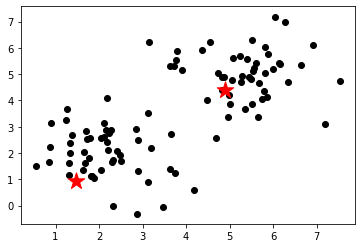

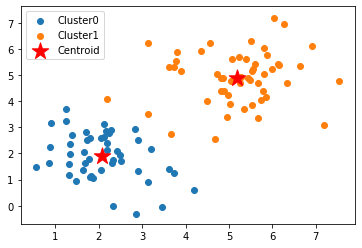

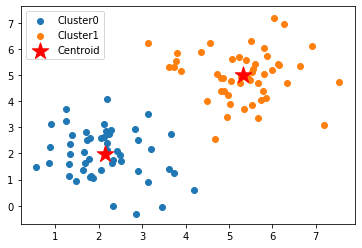

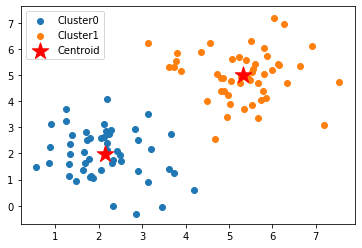

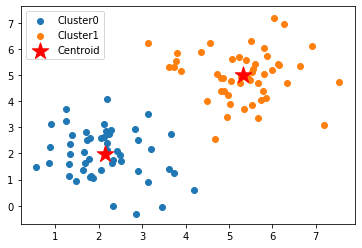

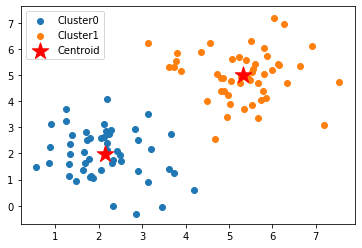

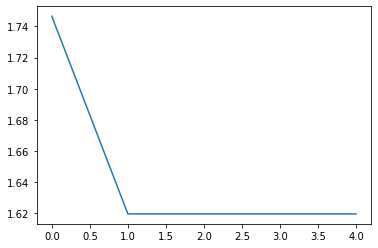

In [78]:
# Main function
X = np.concatenate((x1,x2),axis=0)
N_Clusters = 2
N_Iter = 5
Centroids = Centroids_Init(X, N_Clusters)
plt.figure()
plt.scatter(X[:,0],X[:,1], c='black')
plt.scatter(Centroids[:, 0], Centroids[:, 1], marker='*', s=300, c='r', label='Centroid')
Loss = np.zeros(N_Iter)
for i in range(N_Iter):
    Distance = Compute_Distance(X,Centroids)
    Labels = Assign_Samples(Distance)
    Centroids = Compute_Centroids(X, Labels, N_Clusters)
    Scatter_Plot(X, Labels, Centroids)
    Loss[i] = loss(X,Labels, Centroids)
plt.figure()
plt.plot(np.arange(N_Iter), Loss)

In [79]:
# predict the cluster of new samples
x_test = np.random.multivariate_normal(mean2, cov2, 2)
distance_test =  Compute_Distance(x_test,Centroids)
labels_test = Assign_Samples(distance_test) + 1
for i in range(x_test.shape[0]):
    print('Test point {} belongs to Cluster {}'.format(i, labels_test[i]))

Test point 0 belongs to Cluster 2
Test point 1 belongs to Cluster 2
